In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pathlib import Path



In [ ]:
DATA_DIR = Path("data")
FILES = sorted(DATA_DIR.glob("dblp-ref-*.json"))

def load_dblp(files):
    rows = []
    for fp in files:
        with fp.open() as f:
            for line in f:
                try:
                    rec = json.loads(line)
                except:
                    continue
                
                title = rec.get("title", "")
                abstract = rec.get("abstract", "")
                venue = rec.get("venue", "")
                authors = rec.get("authors", [])
                
                if not title and not abstract:
                    continue

                rows.append({
                    "title": title,
                    "abstract": abstract,
                    "text": f"{title} {abstract}".strip(),
                    "venue": venue,
                    "authors": authors if isinstance(authors, list) else []
                })

    return pd.DataFrame(rows)

df = load_dblp(FILES)
print("Loaded:", df.shape)

sample_size = 20000
df_sample = df.sample(n=sample_size, random_state=42).reset_index(drop=True)

text_data = df_sample['title'].fillna('')


In [ ]:
df = df.dropna(subset=['title', 'year'])
df = df[df['title'].str.strip() != ""]

df = df[df['year'].apply(lambda x: isinstance(x, int))]

df['abstract'] = df['abstract'].fillna("")


In [ ]:
df["num_authors"] = df["authors"].apply(lambda x: len(x) if isinstance(x, list) else 0)
df["num_references"] = df["references"].apply(lambda x: len(x) if isinstance(x, list) else 0)
df["abstract_length"] = df["abstract"].apply(lambda x: len(x.split()))

df["venue_encoded"] = df["venue"].astype('category').cat.codes

numeric_df = df[["year", "n_citation", "num_authors", "num_references", 
                 "abstract_length", "venue_encoded"]]

numeric_df.head()


,year,n_citation,num_authors,num_references,abstract_length,venue_encoded
0,2013,0,8,2,60,4328
1,2011,50,2,13,201,5002
2,2009,50,4,2,64,4751
3,2011,0,5,2,0,0
4,1998,2,2,0,0,0


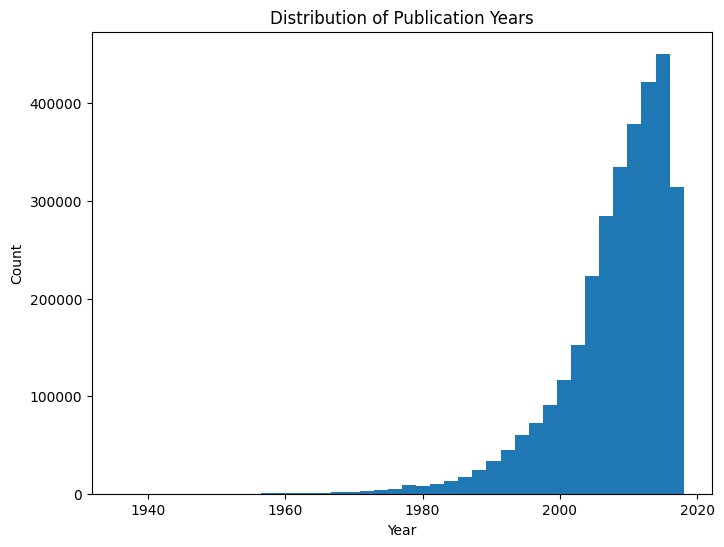

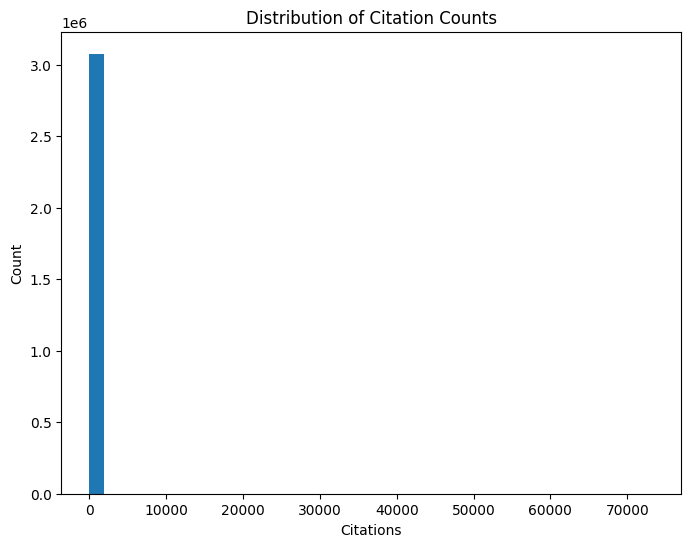

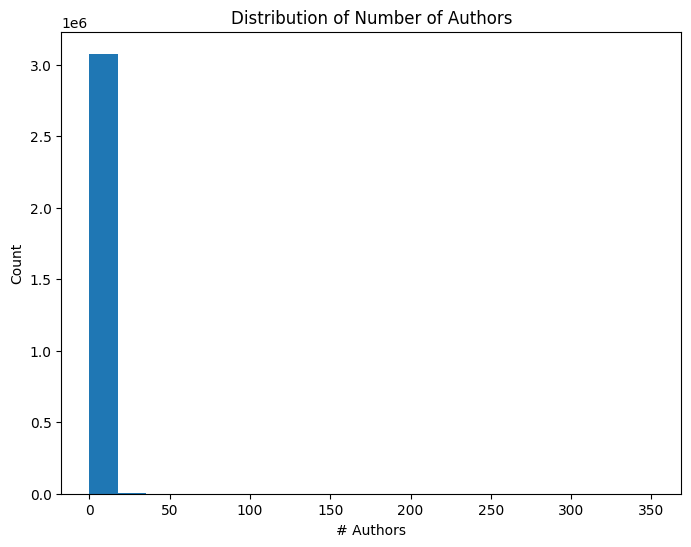

In [ ]:
#Histograms
plt.figure(figsize=(8,6))
plt.hist(df["year"], bins=40)
plt.title("Distribution of Publication Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(df["n_citation"], bins=40)
plt.title("Distribution of Citation Counts")
plt.xlabel("Citations")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(df["num_authors"], bins=20)
plt.title("Distribution of Number of Authors")
plt.xlabel("# Authors")
plt.ylabel("Count")
plt.show()


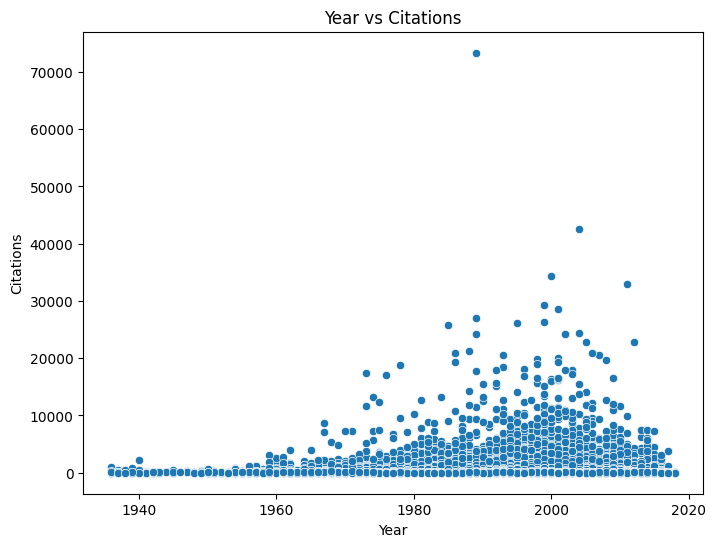

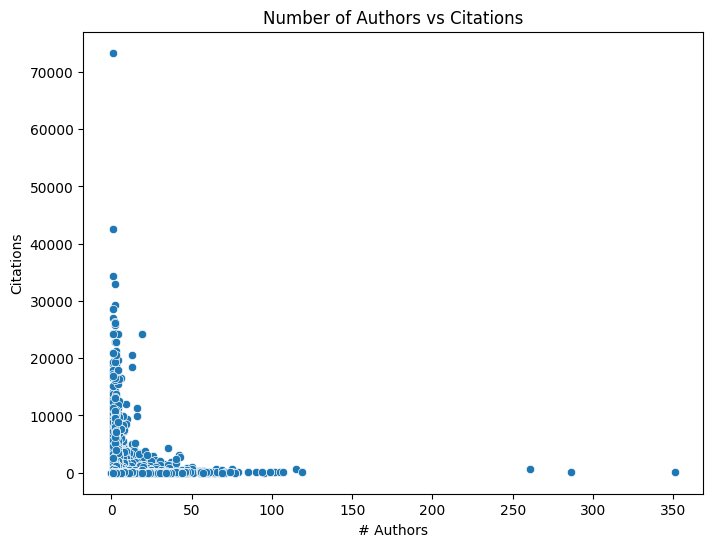

In [ ]:
#Scatter Plots
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['year'], y=df['n_citation'])
plt.title("Year vs Citations")
plt.xlabel("Year")
plt.ylabel("Citations")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["num_authors"], y=df["n_citation"])
plt.title("Number of Authors vs Citations")
plt.xlabel("# Authors")
plt.ylabel("Citations")
plt.show()


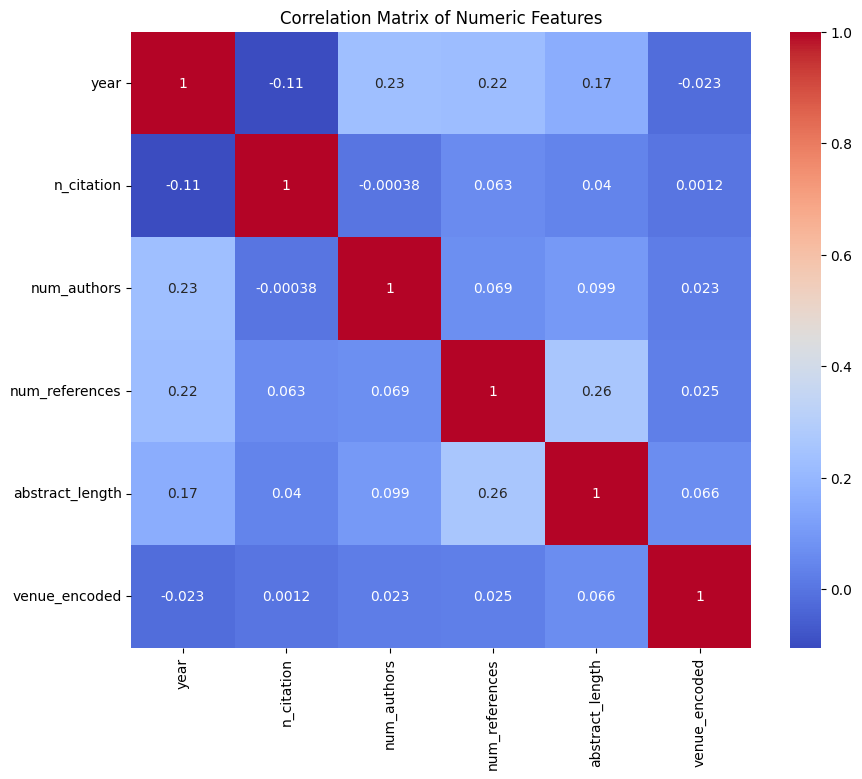

In [ ]:
#Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

Explained variance ratio (original): [0.99018259 0.00788753]


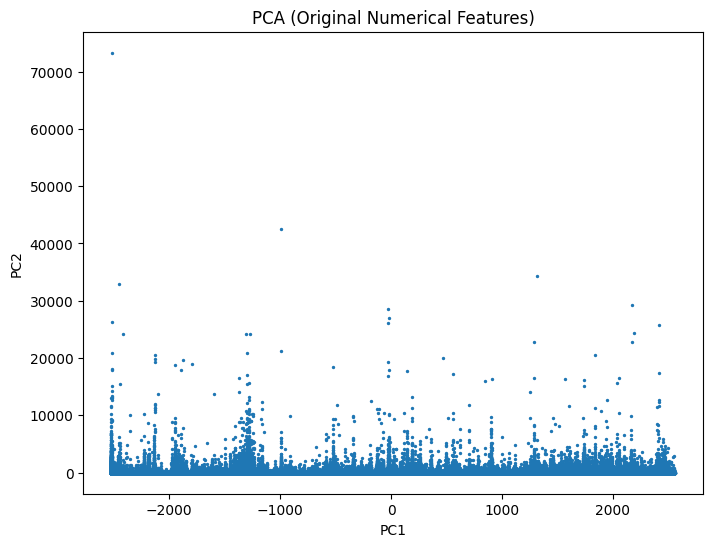

In [ ]:
#PCA
x = numeric_df.values

# PCA without normalization
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(x)

print("Explained variance ratio (original):", pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.scatter(pca_2d[:,0], pca_2d[:,1], s=2)
plt.title("PCA (Original Numerical Features)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Explained variance ratio (Z-Score): [0.2557722  0.18316447]


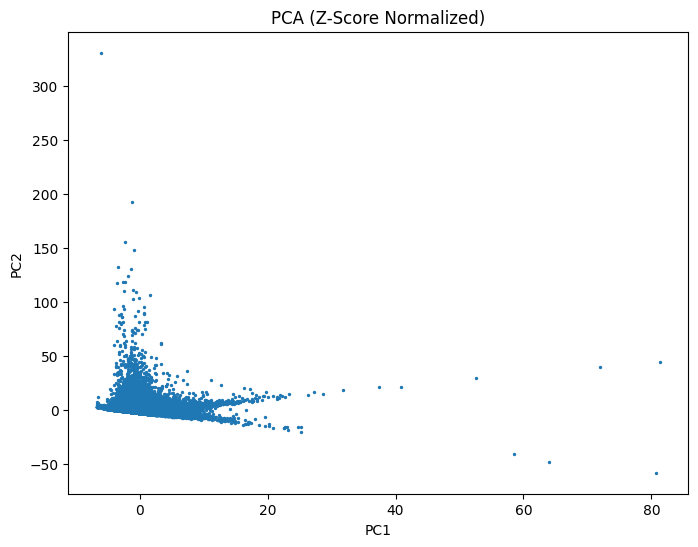

In [ ]:
# PCA with Z-Score Normalization

scaler_z = StandardScaler()
X_z = scaler_z.fit_transform(x)

pca_z = PCA(n_components=2)
pca_z_2d = pca_z.fit_transform(X_z)

print("Explained variance ratio (Z-Score):", pca_z.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.scatter(pca_z_2d[:,0], pca_z_2d[:,1], s=2)
plt.title("PCA (Z-Score Normalized)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Explained variance ratio (Min-Max): [0.92663651 0.0695851 ]


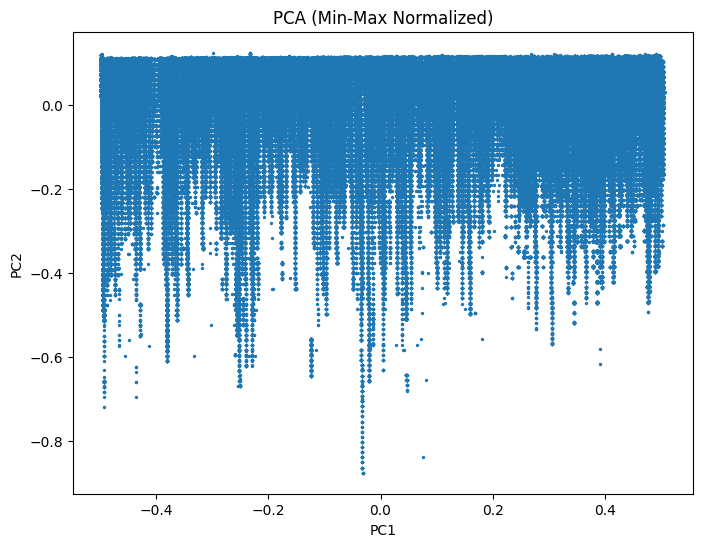

In [ ]:
# PCA with Min-Max Normalization

scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(x)

pca_mm = PCA(n_components=2)
pca_mm_2d = pca_mm.fit_transform(X_mm)

print("Explained variance ratio (Min-Max):", pca_mm.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.scatter(pca_mm_2d[:,0], pca_mm_2d[:,1], s=2)
plt.title("PCA (Min-Max Normalized)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()